
#Inteligencia Artificial  - Semestre 2025-1

## Licenciatura en Tecnología

### Aprendizaje Profundo

#### Autor: Ulises Olivares
#### uolivares@unam.mx
___

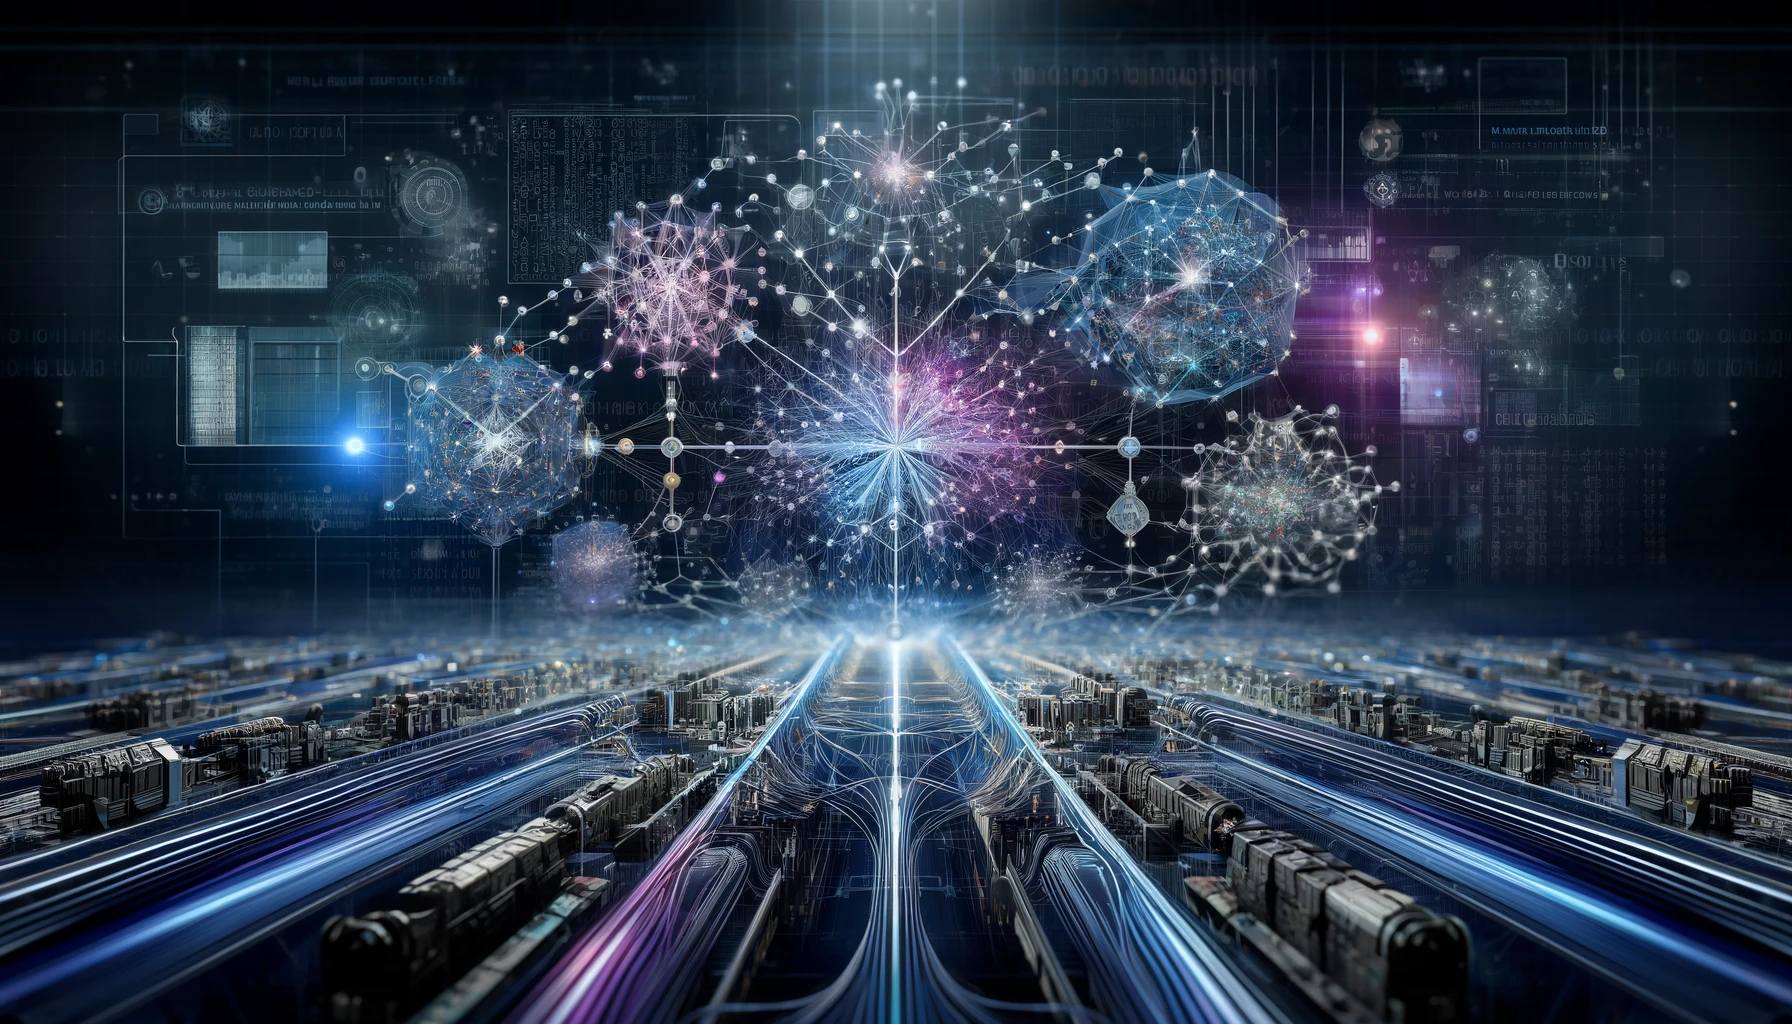


#1.  Autoencoders
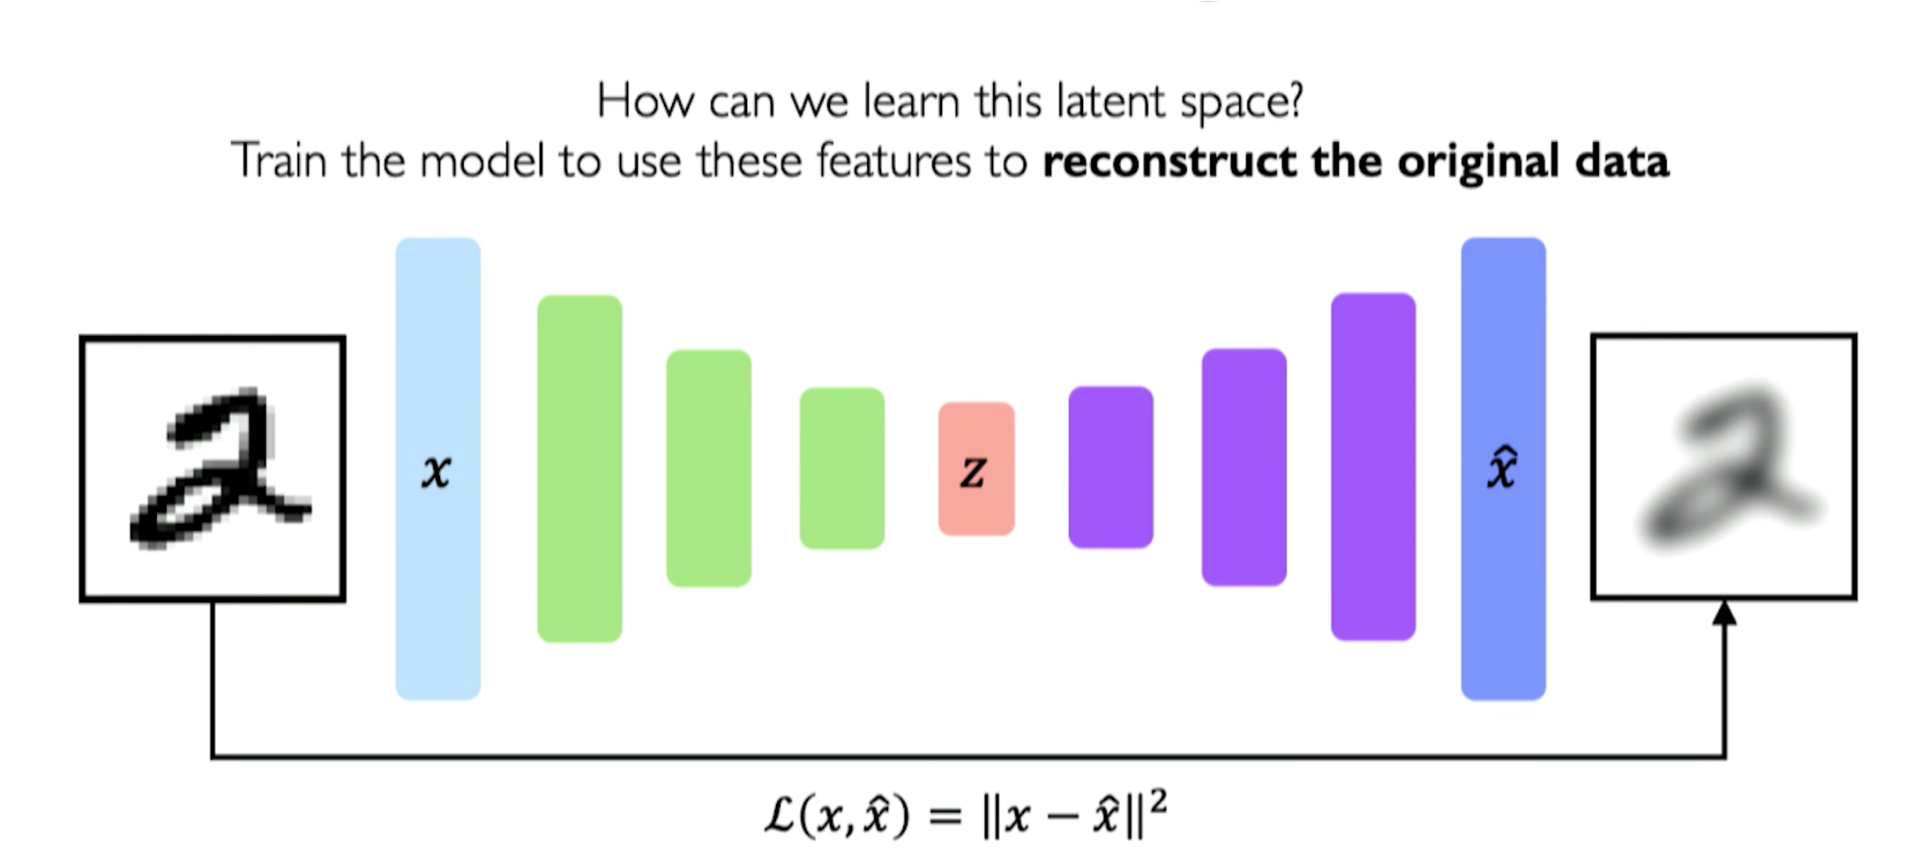

# Autoencoders: Ejemplo y Ejercicios

En este notebook, construiremos un autoencoder simple utilizando Keras y lo entrenaremos en el conjunto de datos MNIST de dígitos escritos a mano. Los autoencoders son redes neuronales utilizadas para aprender una representación (codificación) eficiente de los datos, típicamente para reducción de dimensionalidad o para eliminación de ruido.

In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist


## Cargar y preprocesar los datos

In [ ]:
# Cargar los datos MNIST
(x_train, _), (x_test, _) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [ ]:


# Normalizar los valores de píxeles entre 0 y 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Aplanar las imágenes de 28x28 a vectores de 784 dimensiones
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## Construir el autoencoder

In [ ]:
# Tamaño de nuestra codificación (número de neuronas en la capa oculta)
encoding_dim = 8

# Definir la entrada
input_img = Input(shape=(784,))

# "Encodificador" (Encoder)
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "Decodificador" (Decoder)
decoded = Dense(784, activation='sigmoid')(encoded)

# Modelo completo del autoencoder
autoencoder = Model(input_img, decoded)


## Definir el modelo de codificador por separado (opcional)

In [ ]:
# Este modelo mapea una imagen de entrada a su representación codificada
encoder = Model(input_img, encoded)


## Compilar el modelo

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


## Entrenar el autoencoder

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.4509 - val_loss: 0.2487
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2401 - val_loss: 0.2114
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2063 - val_loss: 0.1910
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1894 - val_loss: 0.1823
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1824 - val_loss: 0.1780
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1786 - val_loss: 0.1755
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1766 - val_loss: 0.1737
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1747 - val_loss: 0.1722
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1734 - val_loss: 0.1710
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1721 - val_loss: 0.1700
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1715 - val_loss: 0.1691
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/st

## Evaluar el autoencoder

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


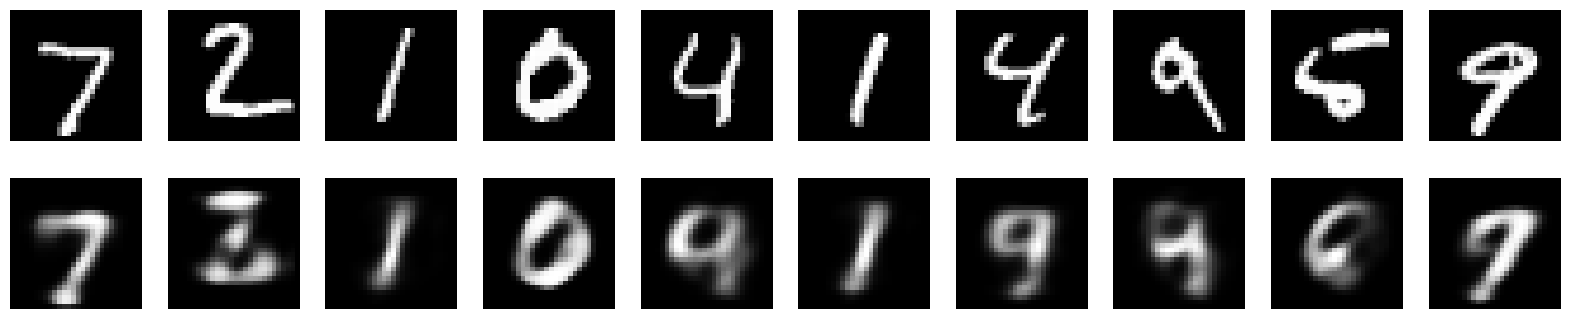

In [ ]:
# Codificar y decodificar algunas imágenes del conjunto de prueba
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Visualizar las imágenes originales y las reconstruidas
n = 10  # Número de dígitos a mostrar
plt.figure(figsize=(20, 4))
for i in range(n):
    # Mostrar imágenes originales
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Mostrar imágenes reconstruidas
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


# Ejercicios para Resolver en Clase

A continuación, se presentan algunos ejercicios para profundizar en el uso y comprensión de los autoencoders.

## Ejercicio 1: Modificar la Dimensión de Codificación

**Objetivo**: Explorar cómo afecta la dimensión de codificación (`encoding_dim`) al rendimiento del autoencoder.

**Instrucciones**:

- Modifica el valor de `encoding_dim` a 16, 64 y 128.
- Entrena el autoencoder con estos nuevos valores.
- Compara las imágenes reconstruidas con las obtenidas originalmente con `encoding_dim = 32`.
- Analiza cómo cambia la calidad de la reconstrucción al variar la dimensión de codificación.

## Ejercicio 2: Implementar un Autoencoder Denoising

**Objetivo**: Aprender a eliminar ruido de las imágenes utilizando un autoencoder.

**Instrucciones**:

- Añade ruido gaussiano a las imágenes de entrenamiento y prueba.
- Entrena el autoencoder utilizando las imágenes ruidosas como entrada y las imágenes originales como salida.
- Visualiza cómo el autoencoder es capaz de eliminar el ruido de las imágenes de prueba.

## Ejercicio 3: Utilizar un Autoencoder Convolucional

**Objetivo**: Implementar un autoencoder utilizando capas convolucionales para mejorar el rendimiento en datos de imagen.

**Instrucciones**:

- Reestructura los datos de entrada para mantener las dimensiones espaciales (28x28x1).
- Construye un autoencoder utilizando capas convolucionales (`Conv2D` y `Conv2DTranspose`).
- Entrena el nuevo modelo y compara los resultados con el autoencoder completamente conectado.

## Ejercicio 4: Visualizar el Espacio Latente

**Objetivo**: Entender cómo se representan los datos en el espacio latente del autoencoder.

**Instrucciones**:

- Utiliza el modelo de codificador para obtener las representaciones latentes de las imágenes de prueba.
- Reduce las dimensiones de las representaciones latentes a 2 usando PCA o t-SNE.
- Genera un gráfico de dispersión (scatter plot) de estas representaciones, coloreando cada punto según la etiqueta del dígito.

## Ejercicio 5: Clasificación Basada en el Espacio Latente

**Objetivo**: Evaluar si las representaciones latentes pueden ser utilizadas para tareas de clasificación.

**Instrucciones**:

- Entrena un clasificador simple utilizando las representaciones latentes como características y las etiquetas de los dígitos como objetivos.
- Compara el rendimiento del clasificador con uno entrenado directamente sobre los píxeles de las imágenes.

## Ejercicio 6: Crear un Variational Autoencoder (VAE) Simple

**Objetivo**: Introducir los conceptos básicos de los autoencoders variacionales.

**Instrucciones**:

- Modifica el modelo del autoencoder para convertirlo en un VAE.
- Implementa las capas de muestreo y la función de pérdida personalizada que incluye el término de regularización Kullback-Leibler.
- Entrena el VAE y genera nuevas imágenes muestreando del espacio latente.

## Ejercicio 7: Compresión de Imágenes con Autoencoders

**Objetivo**: Utilizar el autoencoder para comprimir y descomprimir imágenes.

**Instrucciones**:

- Guarda las representaciones latentes (codificaciones) de las imágenes de prueba.
- Calcula el tamaño de almacenamiento requerido para las codificaciones en comparación con las imágenes originales.
- Discute la eficiencia de compresión y la calidad de las imágenes reconstruidas.

## Ejercicio 8: Explorar Diferentes Funciones de Activación y Optimización

**Objetivo**: Investigar cómo afectan diferentes funciones de activación y optimizadores al rendimiento del autoencoder.

**Instrucciones**:

- Prueba diferentes funciones de activación como `tanh`, `relu` y `leaky_relu`.
- Experimenta con optimizadores como `SGD`, `RMSprop` y `Adamax`.
- Analiza el impacto en la velocidad de convergencia y en la calidad de reconstrucción.

## Ejercicio 9: Detectar Anomalías con Autoencoders

**Objetivo**: Utilizar el autoencoder para detectar imágenes anómalas en el conjunto de datos.

**Instrucciones**:

- Introduce algunas imágenes que no pertenecen al conjunto MNIST (por ejemplo, imágenes de moda o ruido aleatorio) en el conjunto de prueba.
- Calcula el error de reconstrucción para cada imagen de prueba.
- Identifica las imágenes con mayor error de reconstrucción y analiza si corresponden a las imágenes anómalas.

## Ejercicio 10: Autoencoder para Datos No Visuales

**Objetivo**: Aplicar autoencoders a datos de naturaleza diferente a imágenes.

**Instrucciones**:

- Selecciona un conjunto de datos numéricos (por ejemplo, el conjunto de datos de vinos o iris).
- Preprocesa los datos y construye un autoencoder para reducir la dimensionalidad.
- Visualiza las representaciones latentes y discute posibles patrones o agrupaciones.

## 2. Autoencoders Variacionales
Este código crea un Autoencoder Variacional (VAE) que se entrena en el conjunto de datos MNIST. Después del entrenamiento, el modelo puede generar nuevos dígitos que son similares pero no idénticos a los del conjunto de datos original. El espacio latente bidimensional se muestrea para generar una cuadrícula de dígitos, que se visualiza al final del script.

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Capa de muestreo
class Sampling(tf.keras.layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# Cargar y preprocesar el conjunto de datos MNIST
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

# Codificador
encoder_inputs = tf.keras.layers.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = tf.keras.layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(16, activation="relu")(x)
z_mean = tf.keras.layers.Dense(2, name="z_mean")(x)
z_log_var = tf.keras.layers.Dense(2, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = tf.keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

# Decodificador
latent_inputs = tf.keras.layers.Input(shape=(2,))
x = tf.keras.layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = tf.keras.layers.Reshape((7, 7, 64))(x)
x = tf.keras.layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = tf.keras.layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = tf.keras.layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = tf.keras.Model(latent_inputs, decoder_outputs, name="decoder")

# VAE
outputs = decoder(encoder(encoder_inputs)[2])
vae = tf.keras.Model(encoder_inputs, outputs, name="vae")

# Función de pérdida y compilación
reconstruction_loss = tf.keras.losses.binary_crossentropy(tf.keras.layers.Flatten()(encoder_inputs), tf.keras.layers.Flatten()(outputs))
reconstruction_loss *= 28 * 28
kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
kl_loss = tf.reduce_sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer="adam")

# Entrenamiento
vae.fit(x_train, x_train, epochs=30, batch_size=128, validation_data=(x_test, x_test))

# Generar dígitos a partir del espacio latente
n = 15
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
grid_x = np.linspace(-4, 4, n)
grid_y = np.linspace(-4, 4, n)[::-1]

for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size, j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```
